In [55]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

In [ ]:
n = 1000000
beta = 0.01
phi = 0.99
sigma = 0.1
ro = -0.8

e = np.random.randn(n)
u = np.random.randn(n)

h = np.zeros(n)
r = np.zeros(n)
for t in range(1, n):
    h[t] = phi * h[t-1] + ro * sigma * e[t-1] + sigma * np.sqrt(1 - ro ** 2) * u[t]
    r[t] = beta * np.exp(1/2 * h[t]) * e[t]

h = h[10000:]
r = r[10000:]

(990000, 990000)

<h3>Subquestion 1</h3>

Mean of r: 2.247149551923523e-06
Standard deviation of r: 0.01136230403087517


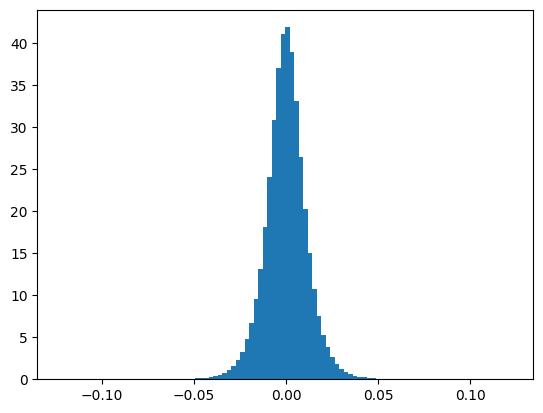

In [19]:
print(f'Mean of r: {r.mean()}')
print(f'Standard deviation of r: {r.std()}')

# plt.plot(r);
plt.hist(r, bins=100, density=True);

<h3>Subquestion 2</h3>

In [ ]:
horizons = [1, 20, 250]
cumrets = {  }
for horizon in horizons:
    cumret = np.zeros(n - 10000 - horizon)
    for t in range(n - 10000 - horizon):
        cumret[t] = r[t:(t+horizon)].sum()
    cumrets[horizon] = {
        'horizon': horizon,
        'cumret': cumret,
        'skewness': skew(cumret),
        'kurtosis': kurtosis(cumret)
    }

cumrets

{1: {'horizon': 1,
  'cumret': array([-0.00674428, -0.00103499,  0.0039048 , ...,  0.00276183,
         -0.00327325,  0.00546189]),
  'skewness': 0.0032172839101140814,
  'kurtosis': 2.0311563686611356},
 20: {'horizon': 20,
  'cumret': array([-0.02777922, -0.01943391, -0.02105777, ...,  0.01186493,
          0.01500357,  0.01352153]),
  'skewness': -0.5822344134614004,
  'kurtosis': 2.540643042355665},
 250: {'horizon': 250,
  'cumret': array([-0.02387535,  0.01172572,  0.00688506, ...,  0.10323587,
          0.09064644,  0.096728  ]),
  'skewness': -1.105850331540423,
  'kurtosis': 3.001083226130774}}

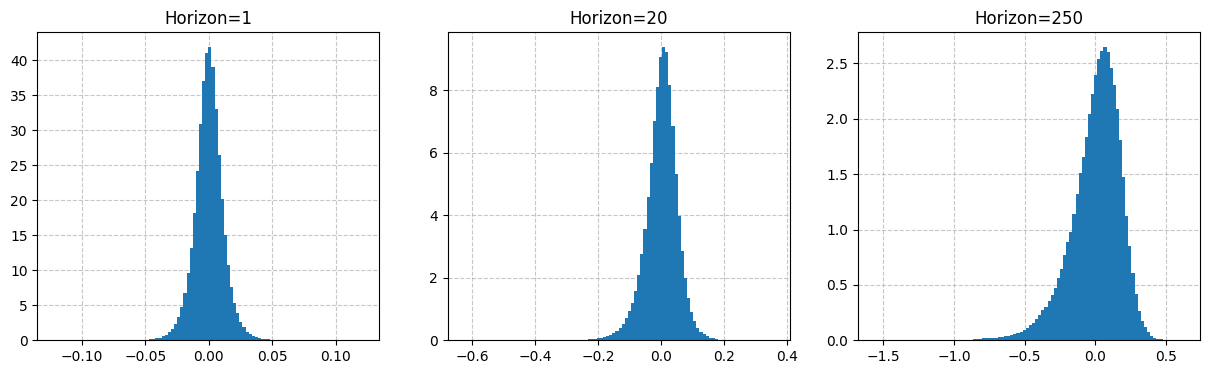

In [62]:
fig, axis = plt.subplots(1, 3, figsize=(15, 4))
for cumret, ax in zip(cumrets.values(), axis):
    ax.set_axisbelow(True)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.hist(cumret['cumret'], bins=100, density=True);
    ax.set_title(f'Horizon={cumret["horizon"]}')

<h3>Subquestion 3</h3>

In [ ]:
thresholds = [ 0.05, 0.01 ]
VaR = np.empty((len(thresholds), len(horizons)))
for i, threshold in enumerate(thresholds):
    for j, horizon in enumerate(horizons):
        VaR[i, j] = np.quantile(cumrets[horizon]['cumret'], threshold)


pd.DataFrame(VaR, columns=horizons, index=thresholds)

,1,20,250
0.05,-0.018275,-0.086683,-0.324470
0.01,-0.029518,-0.145173,-0.550196


<h3>Subquestion 5</h3>

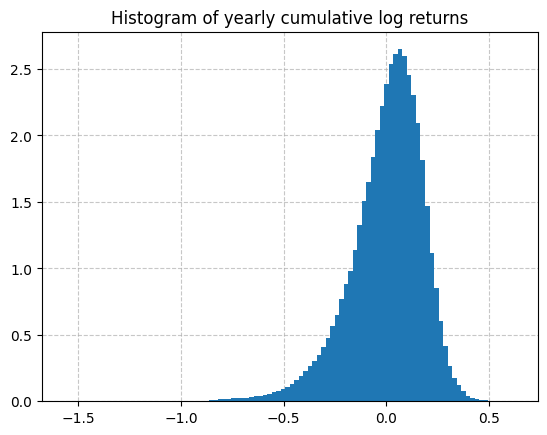

In [61]:
plt.hist(cumrets[250]['cumret'], density=True, bins=100)
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_axisbelow(True)
plt.title('Histogram of yearly cumulative log returns');